In [3]:
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict

In [7]:
with open('./results/cogmap_qwen_result.json', 'r') as f:
    json_data = json.load(f)
# 统计正确答案的数量
correct_count = 0
total_count = len(json_data)

# 遍历每个任务，检查模型答案是否正确
for item in json_data:
    # 比较模型答案与正确答案
    if item["status"] == "Correct":  # 如果答案完全匹配
        correct_count += 1

# 计算正确率
accuracy = (correct_count / total_count) * 100

# 输出结果
print(f"Correct answers: {correct_count}/{total_count}")
print(f"Accuracy: {accuracy:.2f}%")

Correct answers: 108/268
Accuracy: 40.30%


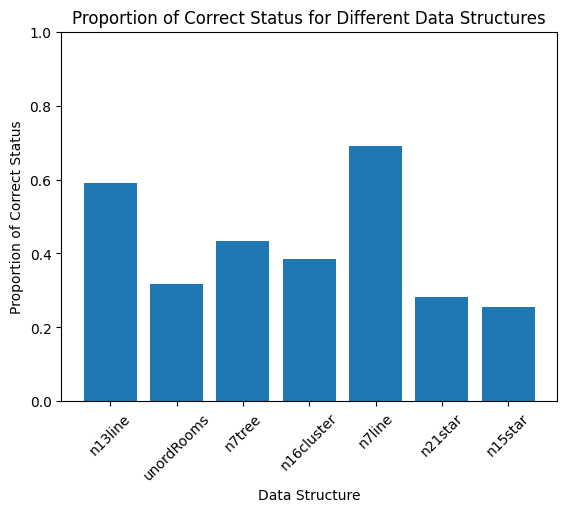

In [13]:
# Function to calculate the proportion of 'Correct' statuses for each data_structure
def calculate_correct_proportion(data):
    status_count = {}
    
    for item in data:
        data_structure = item.get('source', {}).get('data_structure')
        status = item.get('status')
        
        if data_structure:
            if data_structure not in status_count:
                status_count[data_structure] = {'correct': 0, 'total': 0}
            
            status_count[data_structure]['total'] += 1
            if status == 'Correct':
                status_count[data_structure]['correct'] += 1
    
    proportions = {}
    for data_structure, counts in status_count.items():
        proportions[data_structure] = counts['correct'] / counts['total'] if counts['total'] > 0 else 0
    
    return proportions

# Calculate the proportions
proportions = calculate_correct_proportion(json_data)

# Prepare data for plotting
data_structures = list(proportions.keys())
proportions_values = list(proportions.values())

# Plotting the bar chart
plt.bar(data_structures, proportions_values)
plt.xlabel('Data Structure')
plt.ylabel('Proportion of Correct Status')
plt.xticks(rotation=45)
plt.title('Proportion of Correct Status for Different Data Structures')
plt.ylim(0, 1)  # Ensure the y-axis is between 0 and 1

# Show the plot
plt.show()